# Практическая работа 1. Источники данных. Извлечение данных

ФИО: Мальчевская Полина Андреевна

Группа: АДЭУ-201

## Задание 1.1

Используем данные из открытого источника для `CSV`, `Parquet` и `API`, а также вручную подготовим данные для баз данных и HTML  из открытых данных (доступно по адресу https://data.cityofnewyork.us).

In [1]:
# import modules
import certifi
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import urllib3
from urllib3 import request
from unicodedata import normalize

Файлы данных могут быть получены откуда угодно: от файлов, хранящихся локально на вашем устройстве, до файловых систем облачного хранилища.

Даже при работе в основном с базами данных или внешними `API` использование физических файлов — отличный способ легко использовать данные с метками времени, что может пригодиться при любых временных проблемах с подключением.

In [2]:
# Загрузите данные с портала открытых данных Правительства Москвы —
# данные о Wi-Fi в кинотеатрах, введя в браузер следующий URL-адрес: https://data.mos.ru/opendata/60789?isDynamic=false.
# Будет загружен CSV-файл *.csv. Сохраните этот файл.
# прочитать данные CSV, используя команду Pandas pd.read_csv() в качестве df DataFrame, затем выберите первые пять строк DataFrame с помощью df.head().

**Задание 1.1.** Зайти на сайт URL-адрес: https://data.mos.ru/opendata/60789?isDynamic=false

**Задание 1.2.** Загрузить данные о `Wi-Fi в кинотеатрах`.

**Задание 1.3.** Считайте данные из файла CSV. Использовать метод `pandas read_csv` для простоты и скорости.

In [3]:
df_csv = pd.read_csv("data.csv", delimiter=';')
df_csv.head()

,global_id,ID,CinemaName,AdmArea,District,Address,NumberOfAccessPoints,WiFiName,CoverageArea,FunctionFlag,AccessFlag,Password,Latitude_WGS84,Longitude_WGS84,geoData,geodata_center,Unnamed: 16
0,global_id,Код,Наименование кинотеатра,Административный округ,Район,Адрес,Количество точек доступа,Имя Wi-Fi сети,"Зона покрытия, в метрах",Признак функционирования,Условия доступа,Пароль,Широта в WGS-84,Долгота в WGS-84,geoData,geodata_center,NaN
1,879791944,1,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,Останкинский район,"Российская Федерация, город Москва, внутригоро...",7,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.818675,37.636778,"{coordinates=[37.636778, 55.818675], type=Point}",NaN,NaN
2,879791951,3,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Печатники,"город Москва, улица Кухмистерова, дом 4",8,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.685873,37.718534,"{coordinates=[37.718534, 55.685873], type=Point}",NaN,NaN
3,879791953,4,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Текстильщики,"Российская Федерация, город Москва, внутригоро...",6,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.710864,37.731299,"{coordinates=[37.731299, 55.710864], type=Point}",NaN,NaN
4,879791961,7,Государственное бюджетное учреждение культуры ...,Северный административный округ,Тимирязевский район,"Российская Федерация, город Москва, внутригоро...",3,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.814406,37.571210,"{coordinates=[37.57121, 55.814406], type=Point}",NaN,NaN


**Задание 1.4.** Так как первая строка включает определение столбцов, удалить строку с `index=0`.

In [4]:
data = df_csv.drop(df_csv.index[0])

In [5]:
data.head(2)

,global_id,ID,CinemaName,AdmArea,District,Address,NumberOfAccessPoints,WiFiName,CoverageArea,FunctionFlag,AccessFlag,Password,Latitude_WGS84,Longitude_WGS84,geoData,geodata_center,Unnamed: 16
1,879791944,1,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,Останкинский район,"Российская Федерация, город Москва, внутригоро...",7,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.818675,37.636778,"{coordinates=[37.636778, 55.818675], type=Point}",NaN,NaN
2,879791951,3,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Печатники,"город Москва, улица Кухмистерова, дом 4",8,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.685873,37.718534,"{coordinates=[37.718534, 55.685873], type=Point}",NaN,NaN


In [6]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   global_id             12 non-null     object 
 1   ID                    12 non-null     object 
 2   CinemaName            12 non-null     object 
 3   AdmArea               12 non-null     object 
 4   District              12 non-null     object 
 5   Address               12 non-null     object 
 6   NumberOfAccessPoints  12 non-null     object 
 7   WiFiName              12 non-null     object 
 8   CoverageArea          12 non-null     object 
 9   FunctionFlag          12 non-null     object 
 10  AccessFlag            12 non-null     object 
 11  Password              1 non-null      object 
 12  Latitude_WGS84        12 non-null     object 
 13  Longitude_WGS84       12 non-null     object 
 14  geoData               12 non-null     object 
 15  geodata_center        1 n

**Задание 1.5.** Выполнить парсинг веб-страницы с помощью `JSON`

In [7]:
# Импорт стандартных пакетов
import pandas as pd

# Для парсинга веб-страниц
import requests as reqs
import urllib.request
from bs4 import BeautifulSoup
import json
import os
import pprint

# Для выполнения операций с регулярными выражениями
import re

In [8]:
resp = reqs.request(method='GET', url='https://apidata.mos.ru/v1/features/60789?api_key=d2c9daab-9ed9-46dd-ac92-e74a521f4109')

**Задание 1.6.** Выполнить парсинг веб-страницы с помощью `JSON`. Получите URL-адрес:

In [9]:
print(f"URL: \n\t {resp.url}")

URL: 
	 https://apidata.mos.ru/v1/features/60789?api_key=d2c9daab-9ed9-46dd-ac92-e74a521f4109


**Задание 1.7.** Выполнить парсинг веб-страницы с помощью `JSON`. Определите тип контента:

In [10]:
print(f"Content type: \n\t {resp.headers['content-type']}")

Content type: 
	 application/json


**Задание 1.8.** Выполнить парсинг веб-страницы с помощью `JSON`. Обработайте данные с помощью JSON:

In [11]:
if resp.status_code == 200:
   json_page = json.loads(resp.text)

**Задание 1.9.**  Обработайте данные с помощью `JSON`. Посмотреть на ключи:

In [12]:
for x in json_page:
    print(x)

features
type


Распечатать ключи и значения:

In [13]:
for x in json_page:
    print(f"{x} --> {json_page[x]} \n")

features --> [{'geometry': {'coordinates': [37.636778, 55.818675], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 1, 'CinemaName': 'Государственное бюджетное учреждение культуры города Москвы «Московское кино» Кинотеатр «Москино Космос»', 'AdmArea': 'Северо-Восточный административный округ', 'District': 'Останкинский район', 'Address': 'Российская Федерация, город Москва, внутригородская территория муниципальный округ Останкинский, проспект Мира, дом 109', 'NumberOfAccessPoints': 7, 'WiFiName': 'Moscow_WiFi_Free', 'CoverageArea': 50, 'FunctionFlag': 'действует', 'AccessFlag': 'открытая сеть', 'Password': '', 'Latitude_WGS84': '55.818675', 'Longitude_WGS84': '37.636778', 'global_id': 879791944}, 'rowId': None, 'versionNumber': 1, 'releaseNumber': 32}, 'type': 'Feature'}, {'geometry': {'coordinates': [37.718534, 55.685873], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 3, 'CinemaName': 'Государственн

In [14]:
pprint.pprint(json_page)

{'features': [{'geometry': {'coordinates': [37.636778, 55.818675],
                            'type': 'Point'},
               'properties': {'attributes': {'AccessFlag': 'открытая сеть',
                                             'Address': 'Российская Федерация, '
                                                        'город Москва, '
                                                        'внутригородская '
                                                        'территория '
                                                        'муниципальный округ '
                                                        'Останкинский, '
                                                        'проспект Мира, дом '
                                                        '109',
                                             'AdmArea': 'Северо-Восточный '
                                                        'административный '
                                                        'округ',
  

**Задание 1.10.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`

In [15]:
from bs4 import BeautifulSoup as bso

In [16]:
# Отправление запроса на получение данных и присваивание ответ переменной.
source = reqs.get("https://apidata.mos.ru/v1/datasets/60789/features?api_key=d2c9daab-9ed9-46dd-ac92-e74a521f4109")

In [17]:
print(f"Content type: \n\t {source.headers['content-type']}")

Content type: 
	 application/json


In [18]:
print(source)

<Response [200]>


**Задание 1.10.1.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Создать beautiful soup объект.

In [19]:
mysoup = bso(source.text, 'html.parser')

**Задание 1.10.2.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Распечатайте HTML-содержимое страницы, используя метод prettify

In [20]:
print(mysoup.prettify())

{"features":[{"geometry":{"coordinates":[37.636778,55.818675],"type":"Point"},"properties":{"datasetId":60789,"attributes":{"is_deleted":0,"ID":1,"CinemaName":"Государственное бюджетное учреждение культуры города Москвы «Московское кино» Кинотеатр «Москино Космос»","AdmArea":"Северо-Восточный административный округ","District":"Останкинский район","Address":"Российская Федерация, город Москва, внутригородская территория муниципальный округ Останкинский, проспект Мира, дом 109","NumberOfAccessPoints":7,"WiFiName":"Moscow_WiFi_Free","CoverageArea":50,"FunctionFlag":"действует","AccessFlag":"открытая сеть","Password":"","Latitude_WGS84":"55.818675","Longitude_WGS84":"37.636778","global_id":879791944},"rowId":null,"versionNumber":1,"releaseNumber":32},"type":"Feature"},{"geometry":{"coordinates":[37.718534,55.685873],"type":"Point"},"properties":{"datasetId":60789,"attributes":{"is_deleted":0,"ID":3,"CinemaName":"Государственное бюджетное учреждение культуры города Москвы «Московское кино»

**Задание 1.10.3.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Получить заголовок страницы

In [21]:
print(mysoup.title)

None


**Получение данных из таблиц РСУБД**

**Задание 1.11.** Считать результаты запроса sqlite в DataFrame pandas

In [22]:
# Считываем результаты запроса sqlite в DataFrame pandas
with sqlite3.connect("movies.sqlite") as conn:
    df = pd.read_sql("SELECT * from movies", conn)
df.head()

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766


**Получение данных `Parquet`**

Посетите URL https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page.

**Задание 1.12.** Считайте данные из файла Parquet. Использовать метод pandas read_parquet.

In [23]:
df_parquet = pd.read_parquet(r"yellow_tripdata_2023-03.parquet")
df_parquet.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00


## Задание 1.2.  Выполнить парсинг веб-страниц с помощью Beautiful Soup и Pandas открытых источников данных

в доступе по ссылке из варианта отказано (статус 403). данные нашла сама "Курс валют Банк России"  (https://cbr.ru/curreNcy_base/daily/)

### 1.2.1

In [24]:
import requests
from bs4 import BeautifulSoup as bso
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
url = 'https://cbr.ru/curreNcy_base/daily/'

In [26]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [27]:
print(response)

<Response [200]>


In [28]:
print(f"Content type: \n\t {response.headers['content-type']}")

Content type: 
	 text/html; charset=utf-8


In [29]:
mysoup = bso(response.text, 'html.parser')

In [30]:
print(mysoup.prettify()[:1000])

<!DOCTYPE html>
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <meta content="telephone=no" name="format-detection">
   <meta content="ru" name="zoom:lang">
    <meta content="Wed, 14 Feb 2024 21:00:00 GMT" name="zoom:last-modified"/>
    <title>
     Официальные курсы валют на заданную дату, устанавливаемые ежедневно | Банк России
    </title>
    <meta content="/common/images/share-1.jpg" property="og:image"/>
    <link href="/common/libs/jquery-ui/jquery-ui.min.css?v=v599209514" media="all" rel="stylesheet" type="text/css"/>
    <!--[if IE 9]><link rel="stylesheet" type="text/css" href="/common/style/main-ie9.css?v=v3099679977" media="all"><![endif]-->
    <!--[if gt IE 9]><!-->
    <link href="/common/style/main.min.css?v=v3099679977" media="all" rel="stylesheet" type="text/css"/>
    <!-

In [31]:
print(mysoup.title)

<title>Официальные курсы валют на заданную дату, устанавливаемые ежедневно | Банк России</title>


In [32]:
print(mysoup.table)

<table class="data">
<tbody>
<tr>
<th>Цифр. код</th>
<th>Букв. код</th>
<th>Единиц</th>
<th>Валюта</th>
<th>Курс</th>
</tr>
<tr>
<td>036</td>
<td>AUD</td>
<td>1</td>
<td>Австралийский доллар</td>
<td>59,5477</td>
</tr>
<tr>
<td>944</td>
<td>AZN</td>
<td>1</td>
<td>Азербайджанский манат</td>
<td>54,0139</td>
</tr>
<tr>
<td>051</td>
<td>AMD</td>
<td>100</td>
<td>Армянских драмов</td>
<td>22,7146</td>
</tr>
<tr>
<td>933</td>
<td>BYN</td>
<td>1</td>
<td>Белорусский рубль</td>
<td>28,4170</td>
</tr>
<tr>
<td>975</td>
<td>BGN</td>
<td>1</td>
<td>Болгарский лев</td>
<td>50,2962</td>
</tr>
<tr>
<td>986</td>
<td>BRL</td>
<td>1</td>
<td>Бразильский реал</td>
<td>18,4682</td>
</tr>
<tr>
<td>348</td>
<td>HUF</td>
<td>100</td>
<td>Венгерских форинтов</td>
<td>25,3272</td>
</tr>
<tr>
<td>410</td>
<td>KRW</td>
<td>1000</td>
<td>Вон Республики Корея</td>
<td>68,8334</td>
</tr>
<tr>
<td>704</td>
<td>VND</td>
<td>10000</td>
<td>Вьетнамских донгов</td>
<td>38,2982</td>
</tr>
<tr>
<td>344</td>
<td>HKD</td

In [33]:
columns = []
data = []

for th in mysoup.table.find_all('th'):
    columns.append(th.text)

for tr in mysoup.table.find_all('tr')[1:]:
    row = [td.text for td in tr.find_all('td')]
    data.append(row)

df = pd.DataFrame(data, columns=columns)

df.head()

,Цифр. код,Букв. код,Единиц,Валюта,Курс
0,036,AUD,1,Австралийский доллар,"59,5477"
1,944,AZN,1,Азербайджанский манат,"54,0139"
2,051,AMD,100,Армянских драмов,"22,7146"
3,933,BYN,1,Белорусский рубль,"28,4170"
4,975,BGN,1,Болгарский лев,"50,2962"


### 1.2.2

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Цифр. код  43 non-null     object
 1   Букв. код  43 non-null     object
 2   Единиц     43 non-null     object
 3   Валюта     43 non-null     object
 4   Курс       43 non-null     object
dtypes: object(5)
memory usage: 1.8+ KB


In [35]:
df.shape

(43, 5)

In [36]:
df['Курс'] = df['Курс'].str.replace(',', '.').astype(float)
df['Курс'] = df['Курс'].astype(float)
df['Единиц'] = df['Единиц'].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Цифр. код  43 non-null     object 
 1   Букв. код  43 non-null     object 
 2   Единиц     43 non-null     int32  
 3   Валюта     43 non-null     object 
 4   Курс       43 non-null     float64
dtypes: float64(1), int32(1), object(3)
memory usage: 1.6+ KB


In [38]:
df = df.drop(columns=df.columns[:2])

Удаляю лишние столбца

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Единиц  43 non-null     int32  
 1   Валюта  43 non-null     object 
 2   Курс    43 non-null     float64
dtypes: float64(1), int32(1), object(1)
memory usage: 988.0+ bytes


### 1.2.3.

In [40]:
df.head(3)

,Единиц,Валюта,Курс
0,1,Австралийский доллар,59.5477
1,1,Азербайджанский манат,54.0139
2,100,Армянских драмов,22.7146


In [41]:
print(f'Минимальный курс {min(df["Курс"])}')

Минимальный курс 10.2677


In [42]:
print(f'Минимальный курс {max(df["Курс"])}')

Минимальный курс 121.3386


In [43]:
df1 = df.pivot_table(index='Валюта', values='Курс').sort_values(by='Курс', ascending=False).head(43)
df1_top25 = df1.head(25)

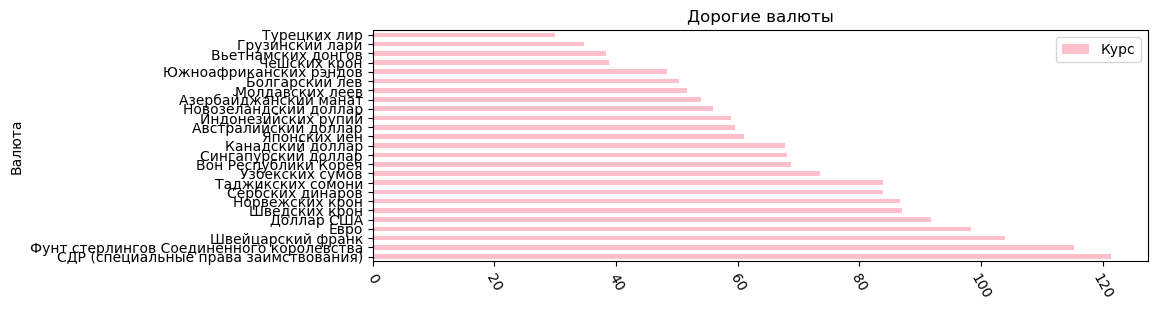

In [44]:
df1_top25.plot(kind='barh', figsize=(10, 3), color='pink')
plt.xticks(rotation=-60)
plt.title('Дорогие валюты')
plt.show()

In [45]:
df2 = df.pivot_table(index='Валюта', values='Курс').sort_values(by='Курс', ascending=True).head(43)
df2_antitop = df2.head(18)

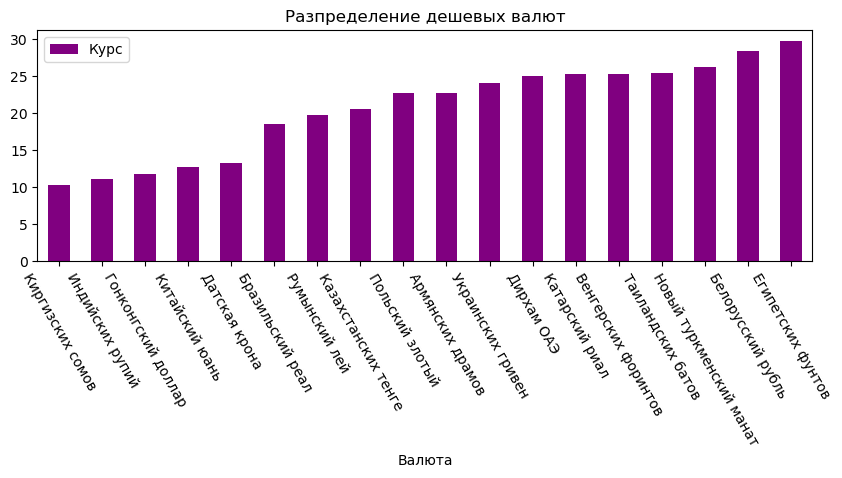

In [46]:
df2_antitop.plot(kind='bar', figsize=(10, 3), color=['purple'])
plt.xticks(rotation=-60)
plt.title('Разпределение дешевых валют')
plt.show()

In [47]:
df2 = df.pivot_table(index='Валюта', values='Единиц').sort_values(by='Единиц', ascending=False)
df2.head(5)

,Единиц
Валюта,
Индонезийских рупий,10000
Узбекских сумов,10000
Вьетнамских донгов,10000
Вон Республики Корея,1000
Сербских динаров,100


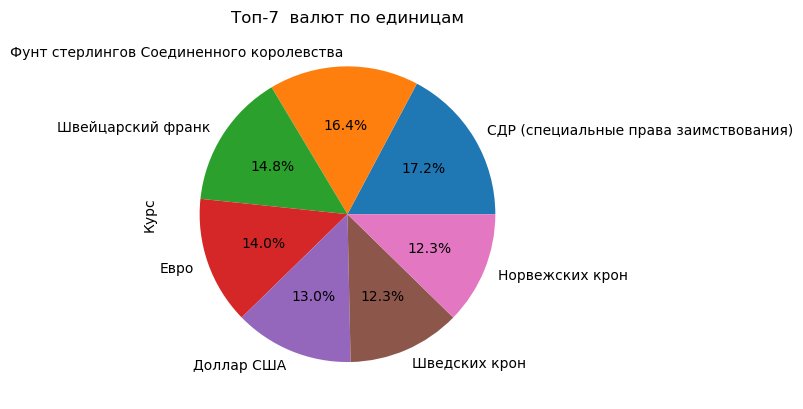

In [48]:
df1_top7 = df1.head(7)

df1_top7.plot(kind='pie', subplots=True, legend=False, autopct='%1.1f%%')
plt.title('Топ-7  валют по единицам')
plt.show()

## Задание 1.3. Выполнить парсинг коллекции данных на Портале открытых данных Правительства Москвы

Аэропорты (https://data.mos.ru/opendata/62883?isDynamic=false)

In [49]:
# Импорт стандартных пакетов
import pandas as pd

# Для парсинга веб-страниц
import requests as reqs
import urllib.request
from bs4 import BeautifulSoup
import json
import os
import pprint
from bs4 import BeautifulSoup as bso

# Для выполнения операций с регулярными выражениями
import re

In [50]:
resp = reqs.request(method='GET', url='https://apidata.mos.ru/v1/features/62883?api_key=d2c9daab-9ed9-46dd-ac92-e74a521f4109')

In [51]:
print(f"URL: \n\t {resp.url}")

URL: 
	 https://apidata.mos.ru/v1/features/62883?api_key=d2c9daab-9ed9-46dd-ac92-e74a521f4109


In [52]:
print(f"Content type: \n\t {resp.headers['content-type']}")

Content type: 
	 application/json


In [53]:
if resp.status_code == 200:
    json_data = resp.json()  # Преобразуем JSON-ответ в словарь Python

    features = json_data['features']

    # Создаем датафрейм из полученных данных
    df = pd.json_normalize(features)
else:
    print('Запрос вернул статус:', response.status_code)

In [54]:
df

,type,geometry.coordinates,geometry.type,properties.datasetId,properties.attributes.is_deleted,properties.attributes.ID,properties.attributes.Name,properties.attributes.Aeroexpress,properties.attributes.AeroexpressStation.global_id,properties.attributes.AeroexpressStation.value,...,properties.attributes.AeroexpressWorkingHours,properties.attributes.MCDStation,properties.attributes.RailwayStation,properties.attributes.Latitude_WGS84,properties.attributes.Longitude_WGS84,properties.attributes.global_id,properties.rowId,properties.versionNumber,properties.releaseNumber,properties.attributes.AeroexpressStation
0,Feature,"[37.900526, 55.414307]",Point,62883,0,1,Домодедово,есть,1.508979e+09,Аэропорт Домодедово,...,"5:30 - 23:30 (с Павелецкого вокзала), 6:00 - 0...",[],[],55.414307,37.900526,1272818040,None,1,22,NaN
1,Feature,"[37.415713, 55.966771]",Point,62883,0,2,Шереметьево,есть,1.508983e+09,Аэропорт Шереметьево,...,"5:15 - 00:31 (с Белорусского вокзала), 04:43 -...",[],[],55.966771,37.415713,1272818309,None,1,22,NaN
2,Feature,"[37.286287, 55.605059]",Point,62883,0,3,Внуково,есть,1.508979e+09,Аэропорт Внуково,...,"6:00 - 23:00 (с Киевского вокзала), 6:00 - 23:...",[],[],55.605059,37.286287,1272818481,None,1,22,NaN
3,Feature,"[37.510824, 55.502859]",Point,62883,0,4,Остафьево,нет,NaN,NaN,...,,[],[],55.502859,37.510824,1272818826,None,1,22,[]
4,Feature,"[38.117812, 55.56155]",Point,62883,0,5,Жуковский,нет,NaN,NaN,...,,[],[],55.561550,38.117812,1272818941,None,1,22,[]


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 23 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   type                                                5 non-null      object 
 1   geometry.coordinates                                5 non-null      object 
 2   geometry.type                                       5 non-null      object 
 3   properties.datasetId                                5 non-null      int64  
 4   properties.attributes.is_deleted                    5 non-null      int64  
 5   properties.attributes.ID                            5 non-null      int64  
 6   properties.attributes.Name                          5 non-null      object 
 7   properties.attributes.Aeroexpress                   5 non-null      object 
 8   properties.attributes.AeroexpressStation.global_id  3 non-null      float64
 9   pro

In [56]:
df = df.drop(columns=df.columns[:4])
df = df.iloc[:, :-5]

In [57]:
df.rename(columns=lambda x: x.replace('properties.attributes.', ''), inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   is_deleted                    5 non-null      int64  
 1   ID                            5 non-null      int64  
 2   Name                          5 non-null      object 
 3   Aeroexpress                   5 non-null      object 
 4   AeroexpressStation.global_id  3 non-null      float64
 5   AeroexpressStation.value      3 non-null      object 
 6   AeroexpressTerminal           5 non-null      object 
 7   AeroexpressTicketWindow       5 non-null      object 
 8   AeroexpressTicketAutomat      5 non-null      object 
 9   AeroexpressWorkingHours       5 non-null      object 
 10  MCDStation                    5 non-null      object 
 11  RailwayStation                5 non-null      object 
 12  Latitude_WGS84                5 non-null      object 
 13  Longitude

In [59]:
df.head(3)

,is_deleted,ID,Name,Aeroexpress,AeroexpressStation.global_id,AeroexpressStation.value,AeroexpressTerminal,AeroexpressTicketWindow,AeroexpressTicketAutomat,AeroexpressWorkingHours,MCDStation,RailwayStation,Latitude_WGS84,Longitude_WGS84
0,0,1,Домодедово,есть,1.508979e+09,Аэропорт Домодедово,есть,есть,есть,"5:30 - 23:30 (с Павелецкого вокзала), 6:00 - 0...",[],[],55.414307,37.900526
1,0,2,Шереметьево,есть,1.508983e+09,Аэропорт Шереметьево,есть,есть,есть,"5:15 - 00:31 (с Белорусского вокзала), 04:43 -...",[],[],55.966771,37.415713
2,0,3,Внуково,есть,1.508979e+09,Аэропорт Внуково,есть,есть,есть,"6:00 - 23:00 (с Киевского вокзала), 6:00 - 23:...",[],[],55.605059,37.286287


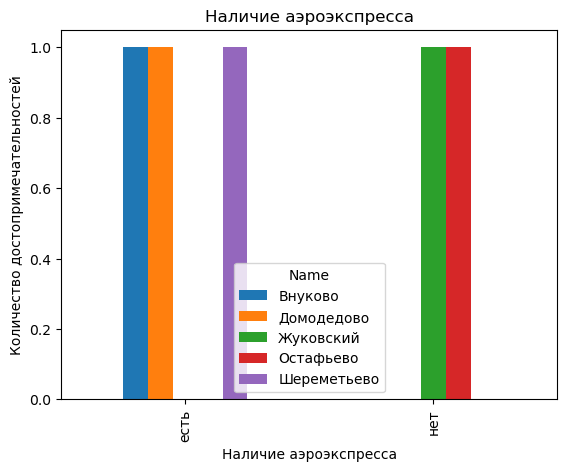

In [60]:
# Создание сводной таблицы, группирующей данные по значению Aeroexpress и Name
pivot_table = pd.pivot_table(df, index='Aeroexpress', columns='Name', values='ID', aggfunc='count')

# Визуализация данных с помощью графика
pivot_table.plot(kind='bar')
plt.xlabel('Наличие аэроэкспресса')
plt.ylabel('Количество достопримечательностей')
plt.title('Наличие аэроэкспресса')
plt.show()

In [61]:
import folium

# Создание карты
map = folium.Map(location=[55.7558, 37.6176], zoom_start=9)  # Определение центра карты и уровня масштабирования

# Добавление маркеров на карту
for index, row in df.iterrows():
    folium.Marker(location=[row['Latitude_WGS84'], row['Longitude_WGS84']], popup=row['Name']).add_to(map)

# Сохранение карты в HTML файл
map.save("map.html")

In [62]:
# Отображение карты
display(map)